In [1]:
import pandas as pd
import h5py
import numpy as np
from sklearn.model_selection import StratifiedKFold
# Importaciones necesarias
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
## ruta archivo
ruta = '/content/drive/MyDrive/ml_datasets/EGG/train.h5'
# with h5py.File('data/train.h5', 'r') as f:
with h5py.File(ruta, 'r') as f:
    print("Keys disponibles ",list(f.keys()))  # Verifica los nombres de los datasets
    data = f['x'][:]  # )
    labels = f['y'][:]  #
# # --- 2. Aplanamiento (Uniendo Canal y Tiempo) ---
# # X_flat tendrá forma (204, 18530)
# # Esto trata cada punto de tiempo como una característica potencial
# X_flat = data.reshape(data.shape[0], data.shape[2])
y = labels.astype(int)


Keys disponibles  ['x', 'y']


In [45]:

# Verifica las formas:
print("Forma de los datos (x):", data.shape)  # Debería ser [n_muestras, 64_electrodos, 256_puntos]
print("Forma de las etiquetas (y):", labels.shape)  # Debería ser [n_muestras,]

Forma de los datos (x): (204, 1, 18530)
Forma de las etiquetas (y): (204,)


In [42]:
data.shape

(204, 1, 18530)

In [28]:
data

array([[[-5.859375e-03, -1.141357e-02, -1.077271e-02, ...,
         -1.989746e-02, -2.163696e-02, -1.885986e-02]],

       [[ 2.380371e-03,  5.126953e-03,  5.737305e-03, ...,
         -3.997803e-03, -5.981445e-03, -7.659912e-03]],

       [[ 5.807495e-02,  1.220398e-01,  1.083069e-01, ...,
         -1.315308e-02, -1.412964e-02, -1.824951e-02]],

       ...,

       [[ 1.516724e-02,  3.179932e-02,  2.697754e-02, ...,
         -2.716064e-03, -8.239746e-04,  3.051758e-04]],

       [[ 2.532959e-03,  5.218506e-03,  3.570557e-03, ...,
         -3.692627e-03, -3.356934e-03, -3.479004e-03]],

       [[-2.990723e-03, -4.119873e-03,  3.662109e-04, ...,
         -6.103516e-05, -9.552002e-03, -1.931763e-02]]])

In [29]:
labels

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1])

Esto que observamos significa que tenemos 204, registros (muestras) y tenemos un número de columnas predictoras de (18530-1) ya que la ultima columna debería ser un bool de 0 o 1.

In [11]:
# Aplanar la señal (quita la dimensión "1")
X_flat = data.reshape(data.shape[0], data.shape[2])

# Crear DataFrame
df = pd.DataFrame(X_flat)
#df["label"] = labels  # añadimos la etiqueta al final

print(f"Forma de la matriz X aplanada (Muestras, Puntos de tiempo): {X_flat.shape}")


Forma de la matriz X aplanada (Muestras, Puntos de tiempo): (204, 18530)


In [43]:
df.head()
# Cantidad de nulos en el dataframe
print(df.isnull().sum().sum())

0


## EDA de nuestra data

In [26]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis

ruta = '/content/drive/MyDrive/ml_datasets/EGG/train.h5'
with h5py.File(ruta, 'r') as f:
    X = f['x'][:]  # shape (204, 1, 18530)
    y = f['y'][:].astype(int)

X = X.reshape(X.shape[0], X.shape[2])  # (n_samples, time_points)
df = pd.DataFrame(X)
print(f"Shape: {X.shape}, Labels shape: {y.shape}")
print("Labels distribution:", pd.Series(y).value_counts(normalize=True))
print("Memory footprint (MB):", X.nbytes / 1e6)



Shape: (204, 18530), Labels shape: (204,)
Labels distribution: 0    0.730392
1    0.269608
Name: proportion, dtype: float64
Memory footprint (MB): 30.24096


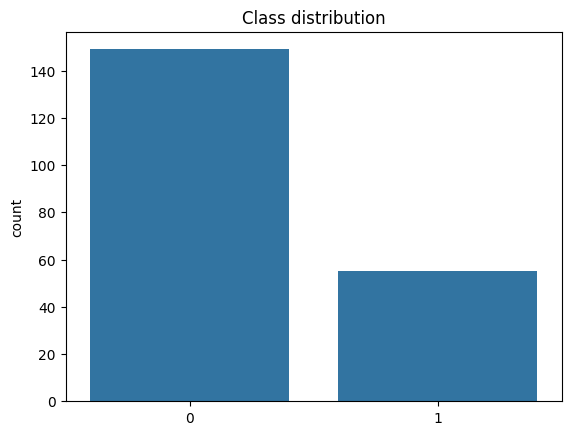

Class proportions: (array([0, 1]), array([149,  55]))


In [18]:
sns.countplot(x=y)
plt.title("Class distribution")
plt.show()

print("Class proportions:", np.unique(y, return_counts=True))


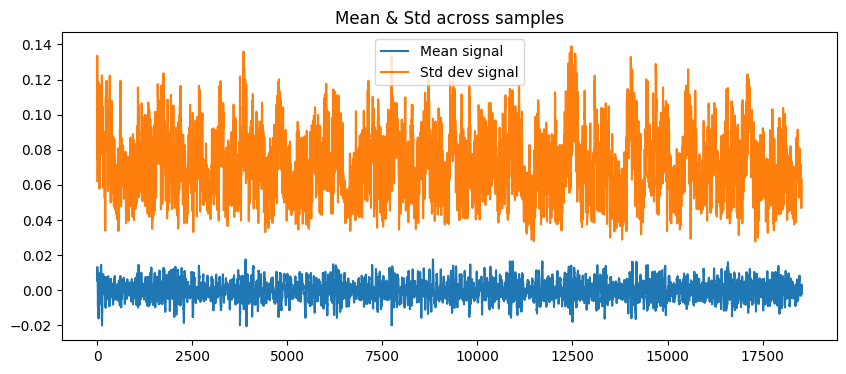

In [19]:
plt.figure(figsize=(10,4))
plt.plot(np.mean(X, axis=0), label='Mean signal')
plt.plot(np.std(X, axis=0), label='Std dev signal')
plt.legend(); plt.title("Mean & Std across samples"); plt.show()


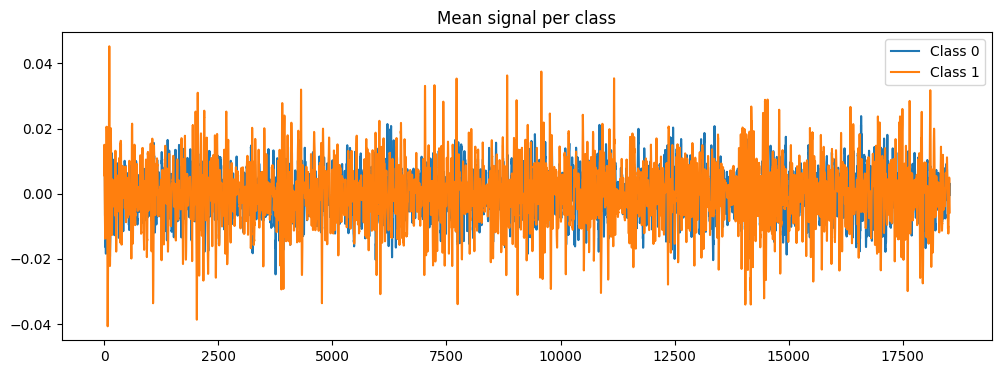

In [20]:
mean_class0 = X[y==0].mean(axis=0)
mean_class1 = X[y==1].mean(axis=0)

plt.figure(figsize=(12,4))
plt.plot(mean_class0, label='Class 0')
plt.plot(mean_class1, label='Class 1')
plt.legend(); plt.title("Mean signal per class"); plt.show()


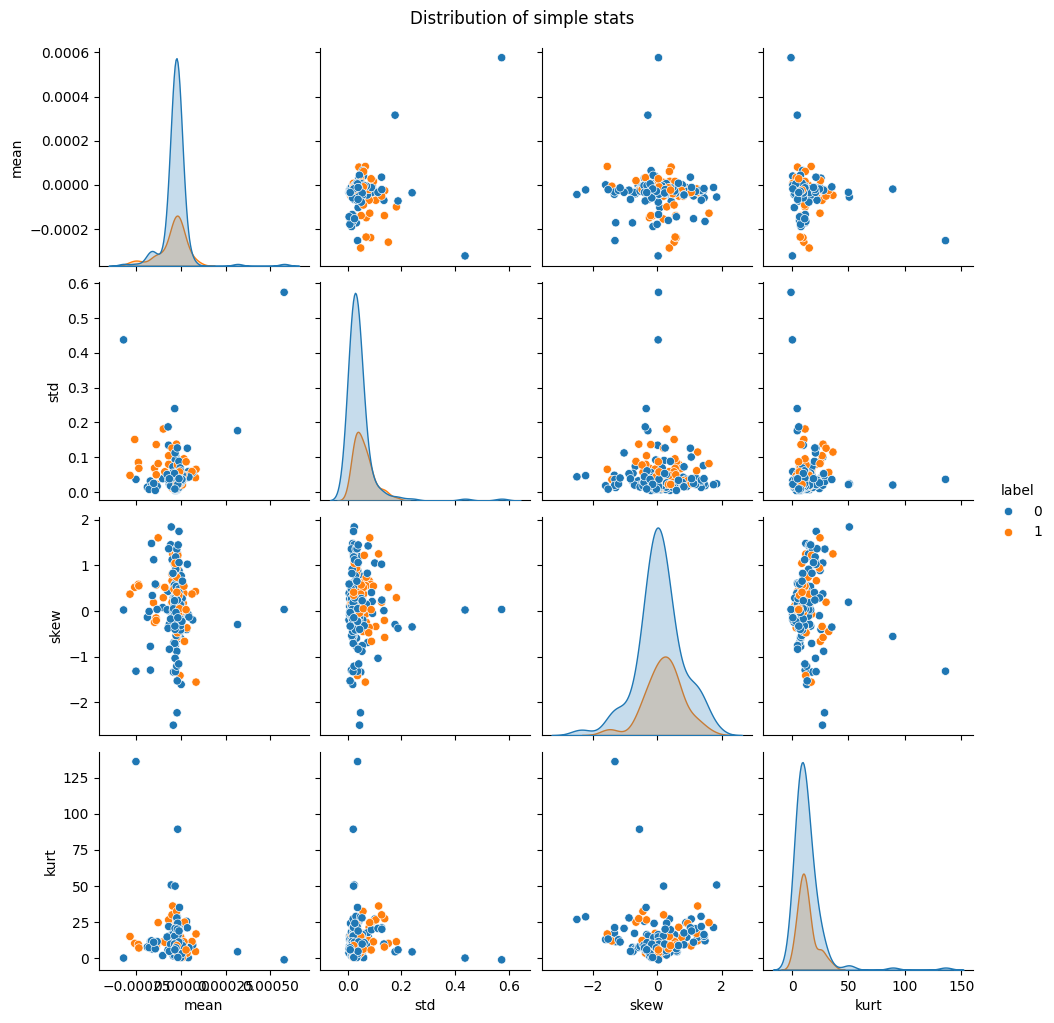

In [21]:
stats = pd.DataFrame({
    "mean": X.mean(axis=1),
    "std": X.std(axis=1),
    "skew": skew(X, axis=1),
    "kurt": kurtosis(X, axis=1),
    "label": y
})

sns.pairplot(stats, hue="label", diag_kind="kde")
plt.suptitle("Distribution of simple stats", y=1.02)
plt.show()


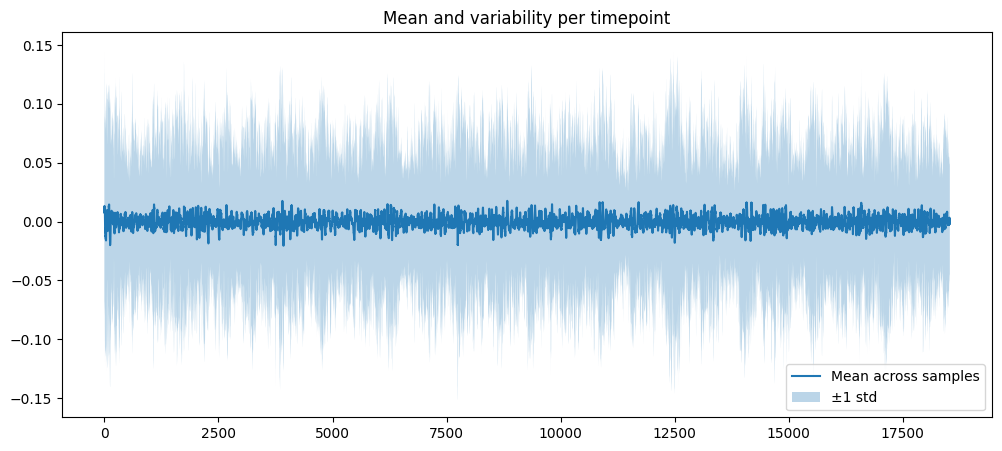

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# X shape: (n_samples, n_times)
global_mean = X.mean()
global_std = X.std()

# media por tiempo
mean_per_time = X.mean(axis=0)
std_per_time = X.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(mean_per_time, label="Mean across samples")
plt.fill_between(range(len(mean_per_time)),
                 mean_per_time - std_per_time,
                 mean_per_time + std_per_time,
                 alpha=0.3, label="±1 std")
plt.title("Mean and variability per timepoint")
plt.legend()
plt.show()


### 2da parte de EDA .
Detenido previamente porque un codigo pensaba uqe trabajrimaos con  features

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Shape: {X.shape}, Labels: {y.shape}")
print("Class distribution:\n", pd.Series(y).value_counts(normalize=True))

print("Signal range:", X.min(), "→", X.max())
print("NaNs:", np.isnan(X).sum())


Shape: (204, 18530), Labels: (204,)
Class distribution:
 0    0.730392
1    0.269608
Name: proportion, dtype: float64
Signal range: -1.0 → 0.9999695
NaNs: 0


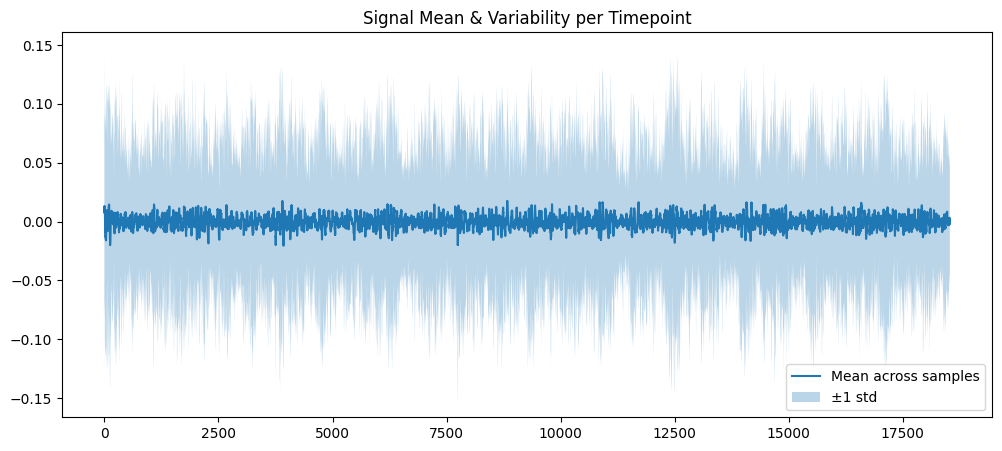

In [33]:
mean_per_time = X.mean(axis=0)
std_per_time = X.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(mean_per_time, label="Mean across samples")
plt.fill_between(range(len(mean_per_time)),
                 mean_per_time - std_per_time,
                 mean_per_time + std_per_time,
                 alpha=0.3, label="±1 std")
plt.title("Signal Mean & Variability per Timepoint")
plt.legend()
plt.show()


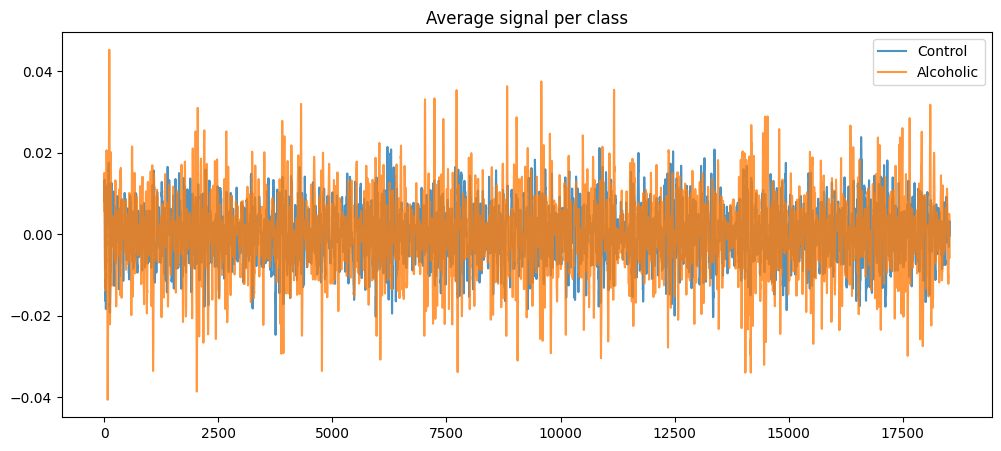

In [36]:
class0_mean = X[y==0].mean(axis=0)
class1_mean = X[y==1].mean(axis=0)

plt.figure(figsize=(12,5))
plt.plot(class0_mean, label="Control", alpha=0.8)
plt.plot(class1_mean, label="Alcoholic", alpha=0.8)
plt.legend()
plt.title("Average signal per class")
plt.show()


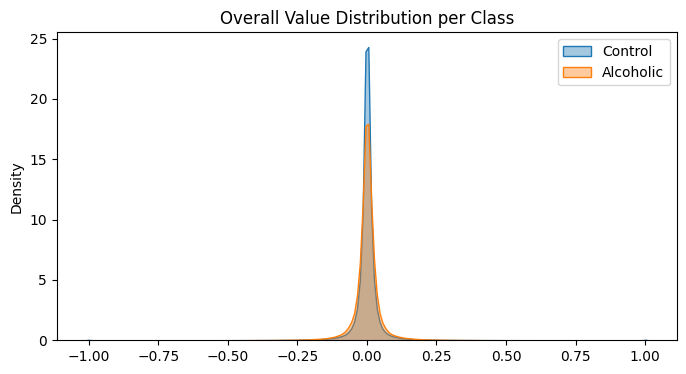

In [37]:
plt.figure(figsize=(8,4))
sns.kdeplot(X[y==0].flatten(), label="Control", fill=True, alpha=0.4)
sns.kdeplot(X[y==1].flatten(), label="Alcoholic", fill=True, alpha=0.4)
plt.legend()
plt.title("Overall Value Distribution per Class")
plt.show()


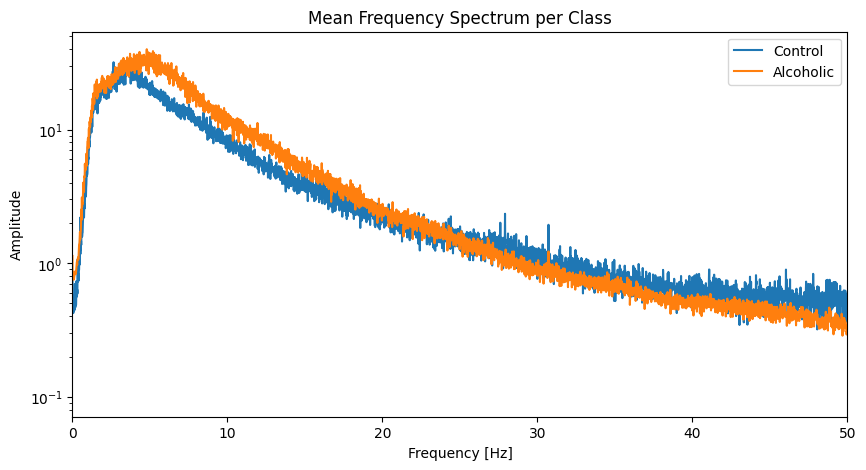

In [38]:
from scipy.fft import rfft, rfftfreq

fs = 256  # Hz (según tu descripción)
freqs = rfftfreq(X.shape[1], d=1/fs)

fft_class0 = np.abs(rfft(X[y==0], axis=1)).mean(axis=0)
fft_class1 = np.abs(rfft(X[y==1], axis=1)).mean(axis=0)

plt.figure(figsize=(10,5))
plt.semilogy(freqs, fft_class0, label="Control")
plt.semilogy(freqs, fft_class1, label="Alcoholic")
plt.xlim(0, 50)  # EEG típico se mira hasta 50 Hz
plt.legend()
plt.title("Mean Frequency Spectrum per Class")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()


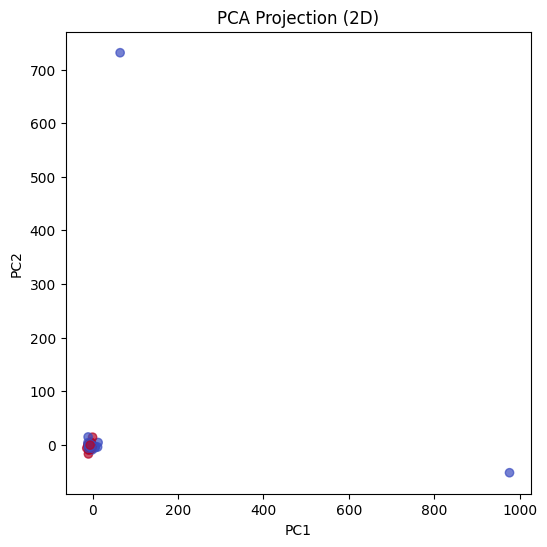

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [40]:
from scipy.stats import skew, kurtosis

def extract_features(X):
    feats = np.column_stack([
        X.mean(axis=1),
        X.std(axis=1),
        skew(X, axis=1),
        kurtosis(X, axis=1)
    ])
    return feats

X_features = extract_features(X)
print("Feature matrix shape:", X_features.shape)



Feature matrix shape: (204, 4)


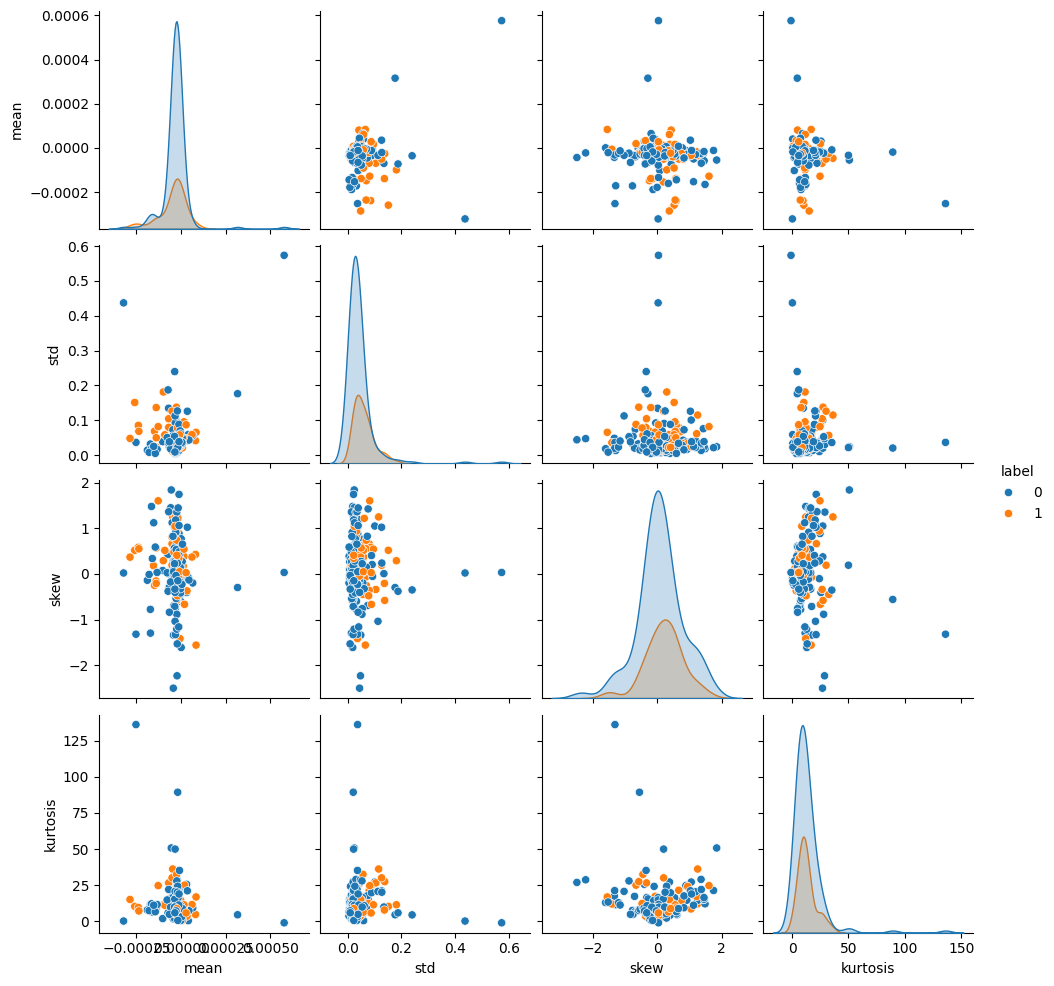

In [41]:
df_feats = pd.DataFrame(X_features, columns=["mean","std","skew","kurtosis"])
sns.pairplot(df_feats.assign(label=y), hue="label")
plt.show()



In [ ]:
# --- 3. Feature Extraction: Características Estadísticas por Muestra (Fila) ---

# Calculamos las estadísticas a lo largo del eje de tiempo (axis=1)
row_mean = np.mean(X_flat, axis=1)        # Media
row_std = np.std(X_flat, axis=1)          # Desviación estándar (volatilidad)
row_range = np.ptp(X_flat, axis=1)        # Rango (peak-to-peak: Max - Min)
row_cv = row_std / (row_mean + 1e-8)      # Coeficiente de Variación

# Combinamos estas 4 nuevas características en la matriz final X
X_features = np.column_stack([
    row_mean,
    row_std,
    row_range,
    row_cv
])

# Convertir a DataFrame para tener nombres de columnas claros
X = pd.DataFrame(X_features, columns=['mean', 'std', 'range', 'cv'])

print("\n--- Extracción de Características Completada ---")
print(f"Forma de la matriz X final para ML: {X.shape}") # (204, 4)


--- Extracción de Características Completada ---
Forma de la matriz X final para ML: (204, 4)


In [ ]:
# --- 4. Definición de Estrategia de Evaluación ---
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Machine (SVM) ---
print("\n--- Modelo 1: Support Vector Machine (SVM) ---")
# SVM necesita escalado (StandardScaler) para funcionar correctamente
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', C=1.0, random_state=42))
])

accs_svm = cross_val_score(pipe_svm, X, y, cv=skf, scoring='accuracy')

print(f"Accuracies (SVM, {k} folds): {accs_svm}")
print(f"-> Precisión Media (SVM): {np.mean(accs_svm):.4f}")

# --- 4.2. Modelo 2: k-Nearest Neighbors (k-NN) ---
print("\n--- Modelo 2: k-Nearest Neighbors (k-NN) ---")
# k-NN es muy sensible a la escala, por lo que el scaler es crucial
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])

accs_knn = cross_val_score(pipe_knn, X, y, cv=skf, scoring='accuracy')

print(f"Accuracies (k-NN, {k} folds): {accs_knn}")
print(f"-> Precisión Media (k-NN): {np.mean(accs_knn):.4f}")


--- Modelo 1: Support Vector Machine (SVM) ---
Accuracies (SVM, 5 folds): [0.73170732 0.73170732 0.73170732 0.73170732 0.725     ]
-> Precisión Media (SVM): 0.7304

--- Modelo 2: k-Nearest Neighbors (k-NN) ---
Accuracies (k-NN, 5 folds): [0.63414634 0.6097561  0.73170732 0.65853659 0.675     ]
-> Precisión Media (k-NN): 0.6618


In [ ]:
# --- 4. Extracción de Características de Frecuencia con FFT ---
# Utilizaremos la matriz aplanada X_flat de (204, 18530)

def extract_fft_features(X_data, num_features=3):
    """Calcula las potencias de las 'num_features' frecuencias más altas."""
    X_fft_features = []

    for row in X_data:
        # 1. Aplicar la Transformada Rápida de Fourier
        fft_values = np.fft.fft(row)
        # 2. Calcular la potencia (magnitud al cuadrado)
        power_spectrum = np.abs(fft_values)**2
        # 3. Solo nos interesa la mitad positiva del espectro (por simetría)
        half_len = len(power_spectrum) // 2
        positive_power = power_spectrum[:half_len]

        # 4. Encontrar los índices de las 'num_features' potencias más altas
        top_indices = np.argsort(positive_power)[-num_features:]

        # 5. Guardar las potencias correspondientes (las magnitudes son nuestras features)
        top_powers = positive_power[top_indices]

        # Aseguramos que siempre haya 'num_features' elementos
        if len(top_powers) < num_features:
            top_powers = np.pad(top_powers, (num_features - len(top_powers), 0), 'constant')

        X_fft_features.append(top_powers)

    return np.array(X_fft_features)

# Generar 3 features de frecuencia
X_fft = extract_fft_features(X_flat, num_features=3)
fft_df = pd.DataFrame(X_fft, columns=['fft_p1', 'fft_p2', 'fft_p3'])

# --- 5. Unir Todas las Características ---
# X_stat es el DataFrame con mean, std, range, cv
# X_new contendrá las 4 estadísticas + las 3 potencias de FFT (7 features)
X_new = pd.concat([X, fft_df], axis=1)

print("\n--- Feature Engineering Avanzado (Estadísticas + FFT) Completado ---")
print(f"Forma de la matriz X final (para los modelos): {X_new.shape}")

# Ahora, puedes usar X_new en el Paso 3 (entrenamiento de SVM y k-NN).
# Simplemente reemplaza la variable 'X' con 'X_new' en los pipelines.


--- Feature Engineering Avanzado (Estadísticas + FFT) Completado ---
Forma de la matriz X final (para los modelos): (204, 7)


In [ ]:
import numpy as np
from tsfresh import extract_features

# melt convierte tu DataFrame de ancho a largo
df_long = pd.melt(df.reset_index(), id_vars=['index'], var_name="time", value_name="value")

# renombramos columnas para TsFresh
df_long = df_long.rename(columns={'index':'id'})

# id = cuál muestra pertenece cada valor
df_long["id"] = df_long["id"].astype(int)
df_long["time"] = df_long["time"].astype(int)

In [ ]:
features = extract_features(df_long, column_id="id", column_sort="time", disable_progressbar=True)

MemoryError: Unable to allocate 5.12 GiB for an array with shape (18529, 18529, 2) and data type float64

In [ ]:
features.

In [ ]:
# Paso 1: Cargar datos (listo)


# Paso 2: EDA
import numpy as np
print("Número de muestras por clase:", np.unique(labels, return_counts=True))

# Paso 3: Preparar DataFrame para TsFresh
import pandas as pd
df_list = []
for i in range(data.shape[0]):
    for t in range(data.shape[2]):
        df_list.append({'id': i, 'time': t, 'value': data[i,0,t]})
df_tsfresh = pd.DataFrame(df_list)

# Paso 4: Extraer características (ejecutar en una máquina potente o submuestrear)
from tsfresh import extract_features
features = extract_features(df_tsfresh, column_id='id', column_sort='time')

Número de muestras por clase: (array([0, 1]), array([149,  55]))


Feature Extraction:   0%|          | 0/19 [01:02<?, ?it/s]


MemoryError: Unable to allocate 5.12 GiB for an array with shape (18529, 18529, 2) and data type float64